<a href="https://colab.research.google.com/github/Sulthon-Araska/Basic-Computational-Astronomy-Astrostatistics/blob/main/Least-squares%20Polynomial%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AS3221 Statistika dan *Data Mining*
# **[Tugas Lab Mandiri](https://edunex.itb.ac.id/courses/58297/preview/237985)**
---
Nama: **Sulthon Furqandhani Araska** \
NIM: **10321013**

**Petunjuk** \
Jawab, kerjakan, tulis, dan dokumentasikanlah pekerjaanmu dalam satu file PDF. Unggahlah file PDF tersebut ke modul ini.

# **Pemeriksaan Dataset**
1.   Dengan mengabaikan dua fitur (kolom) terakhir di kedua file CSV sejenis terlampir di Google Drive ([**2023KQ5_123_N.csv**](https://drive.google.com/file/d/1g01a1hRJQQsyUvsYxMOiE_vw0Ki3aN24/view?usp=sharing) dan [**2023KQ5_124_N.csv**](https://drive.google.com/file/d/1vkRZus_r1HStmC0xEOjRo7qjiNPXcvQy/view?usp=sharing)), apakah dataset keduanya benar-benar sudah bersih?
2.   Tunjukkan buktinya dengan menggunakan tools yang paling cepat dan mudah (tidak harus programming), misalnya dengan spreadsheet (Excel dan yang serupa), atau via terminal, atau menggunakan *TOPCAT*.
3.   Jika benar ada dataset yang belum bersih pada suatu fitur di dalam dataset, ***tulis dan tunjukkan dua usulan skema perbaikan atau pembersihan yang Anda usulkan***.



In [33]:
# @title 0. Persiapan Dataset

# Import libraries
import pandas as pd, numpy as np
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

# Membaca datasets
URL1    = 'https://drive.google.com/file/d/1g01a1hRJQQsyUvsYxMOiE_vw0Ki3aN24/view?usp=drive_link'.split('/')[-2]
URL2    = 'https://drive.google.com/file/d/1vkRZus_r1HStmC0xEOjRo7qjiNPXcvQy/view?usp=drive_link'.split('/')[-2]
KQ5_123 = f'https://drive.google.com/uc?id={URL1}'
KQ5_124 = f'https://drive.google.com/uc?id={URL2}'
D1 = pd.read_csv(KQ5_123).iloc[:, :-2]
D2 = pd.read_csv(KQ5_124).iloc[:, :-2]

# Memperlihatkan datasets
display(D1)
display(D2)

Drive already mounted at /gdrive/; to attempt to forcibly remount, call drive.mount("/gdrive/", force_remount=True).
/gdrive


,t,dt,x,y,z,dcSun,dsSun,Rsun,dcMer,dsMer,...,perihel,e,Porb,KL,inc,Omg,omg,f,E,J
0,0.0,0.000,0.353436,0.522323,-0.526779,0.827266,0.822616,0.00465,0.982611,0.982595,...,0.821727,0.072842,0.833814,0.383464255,67.4,-144.4,224.0,360.0,-0.000112,0.003535
1,100.1,0.007,0.112751,0.431270,-0.700942,0.829199,0.824548,0.00465,1.084098,1.084082,...,0.829503,0.081258,0.857325,0.378078742,67.7,-144.8,234.6,11.1,-0.000112,0.003535
2,200.2,0.004,-0.173190,0.276712,-0.776042,0.840609,0.835959,0.00465,0.862197,0.862181,...,0.825344,0.086113,0.857675,0.385768104,67.2,-144.7,227.5,41.2,-0.000112,0.003535
3,300.3,0.011,-0.416572,0.082024,-0.745872,0.859678,0.855027,0.00465,1.002107,1.002091,...,0.823264,0.081107,0.847461,0.379658934,67.6,-144.8,227.1,62.8,-0.000112,0.003535
4,400.4,0.005,-0.617704,-0.114726,-0.620863,0.883578,0.878927,0.00465,0.719998,0.719981,...,0.825787,0.082105,0.852750,0.384914475,67.3,-145.0,228.5,81.8,-0.000112,0.003535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,99599.6,0.011,0.312522,0.288726,0.845794,0.944388,0.939737,0.00465,0.872425,0.872408,...,0.805490,0.099620,0.845591,0.399759008,66.3,-18.0,307.0,130.3,-0.000112,0.003535
996,99699.7,0.005,0.075383,0.365802,0.882516,0.961263,0.956613,0.00465,1.073501,1.073485,...,0.795324,0.100281,0.830548,0.385599372,67.2,-18.2,302.6,150.0,-0.000112,0.003535
997,99799.8,0.006,-0.158938,0.445379,0.851803,0.971635,0.966984,0.00465,0.915918,0.915902,...,0.811318,0.093468,0.846099,0.398707787,66.4,-18.4,304.4,163.1,-0.000112,0.003535
998,99899.9,0.009,-0.385712,0.469078,0.763972,0.975205,0.970554,0.00465,1.124054,1.124037,...,0.805204,0.096027,0.840107,0.389380682,67.0,-18.2,306.3,175.4,-0.000112,0.003535


,t,dt,x,y,z,dcSun,dsSun,Rsun,dcMer,dsMer,...,perihel,e,Porb,KL,inc,Omg,omg,f,E,J
0,0.0,0.000,0.353434,0.522321,-0.526782,0.827266,0.822616,0.00465,0.982611,0.982595,...,0.821727,0.072842,0.833814,0.383464,67.4,-144.4,224.0,0.0,-0.000112,0.003535
1,100.1,0.007,0.112686,0.431239,-0.700973,0.829200,0.824550,0.00465,1.084071,1.084055,...,0.829503,0.081256,0.857323,0.378079,67.7,-144.8,234.6,11.1,-0.000112,0.003535
2,200.2,0.004,-0.173315,0.276629,-0.776052,0.840616,0.835966,0.00465,0.862257,0.862240,...,0.825345,0.086113,0.857676,0.385768,67.2,-144.7,227.5,41.3,-0.000112,0.003535
3,300.3,0.011,-0.416731,0.081883,-0.745816,0.859693,0.855042,0.00465,1.002066,1.002050,...,0.823262,0.081107,0.847460,0.379659,67.6,-144.8,227.1,62.8,-0.000112,0.003535
4,400.4,0.005,-0.617860,-0.114914,-0.620706,0.883601,0.878951,0.00465,0.719949,0.719932,...,0.825785,0.082106,0.852747,0.384914,67.3,-145.0,228.5,81.9,-0.000112,0.003535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,99599.6,0.011,-0.783324,0.419489,0.230708,0.912945,0.908295,0.00465,1.062407,1.062390,...,0.818349,0.129069,0.910208,0.404803,65.9,-21.5,251.2,272.9,-0.000112,0.003535
996,99699.7,0.005,0.787700,0.004401,0.663050,1.031132,1.026482,0.00465,0.875299,0.875283,...,0.806978,0.128655,0.890668,0.399432,66.2,-21.4,250.9,153.8,-0.000112,0.003535
997,99799.8,0.006,-0.272653,-0.233295,-0.725288,0.811712,0.807061,0.00465,0.853765,0.853749,...,0.808796,0.121746,0.883155,0.396836,66.4,-21.3,252.4,5.5,-0.000112,0.003535
998,99899.9,0.009,-0.127201,0.473067,0.896854,1.022568,1.017917,0.00465,1.068437,1.068420,...,0.808777,0.127926,0.892529,0.399971,66.2,-21.2,253.5,213.0,-0.000112,0.003535


In [34]:
# @title 1. Identifikasi Kebersihan Data

# Menghitung banyak sel kosong dalam dataset
Null_1 = D1.isnull().sum().sum()
Null_2 = D2.isnull().sum().sum()

# Menentukan dataset sudah/belum bersih
if Null_1>0: kebersihan_1 = (f'belum bersih karena terdapat {Null_1} sel kosong.')
else       : kebersihan_1 = 'sudah bersih.'
if Null_2>0: kebersihan_2 = (f'belum bersih karena terdapat {Null_2} sel kosong.')
else       : kebersihan_2 = 'sudah bersih'

# Pernyataan dataset bersih/kotor
print('Dataset 2023KQ5_123_N', kebersihan_1, '\n'
      'Dataset 2023KQ5_124_N', kebersihan_2)

Dataset 2023KQ5_123_N sudah bersih. 
Dataset 2023KQ5_124_N sudah bersih


In [35]:
# @title 2. Pembuktian dataset belum bersih

D1_null = D1.isnull()
D2_null = D2.isnull()

display(D1_null)

,t,dt,x,y,z,dcSun,dsSun,Rsun,dcMer,dsMer,...,perihel,e,Porb,KL,inc,Omg,omg,f,E,J
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# **Regresi Linear 1**

Lakukan regresi linear untuk data berikut (dapat menggunakan spreadsheet seperti Excel, tidak harus pakai python programming) agar dapat diperoleh model berbentuk: $f(x) = a + bx$

In [41]:
# @title Dataset 1
RL1 = pd.DataFrame({'x':[0,2,4,6,9,11,12,15,17,19],
                    'y':[5,6,7,6,9,8,7,10,12,12]})
display(RL1)

,x,y
0,0,5
1,2,6
2,4,7
3,6,6
4,9,9
5,11,8
6,12,7
7,15,10
8,17,12
9,19,12


In [42]:
# @title Regresi Linear

# Statistika inferens
n   = len(RL1)
Σx  = np.sum(RL1['x']); X = Σx/n
Σy  = np.sum(RL1['y']); Y = Σy/n
Σxy = 0; Σx2 = 0; Σy2 = 0
for i in range(n):
  Σxy += RL1['x'][i]*RL1['y'][i]
  Σx2 += (RL1['x'][i])**2
  Σy2 += (RL1['y'][i])**2

# Koefisien regresi
b = (n*Σxy - Σx*Σy)/(n*Σx2 - (Σx)**2) # Gradien
a = Y - b*X                           # Konstanta
r = (n*Σxy - Σx*Σy)/np.sqrt((n*Σx2 - (Σx)**2)*(n*Σy2 - (Σy)**2))

# Persamaan regresi
print('Persamaan regresi linear:', '\n'
      f'y = {a} + {b}x')

Persamaan regresi linear: 
y = 4.851535380507342 + 0.35246995994659547x


Dengan membaca persamaan (17.10) di halaman (termaktub) 461, contoh di halaman 462, contoh di halaman 471–473 buku [*Numerical Methods for Engineers*](https://drive.google.com/file/d/1rmd2GoNMzVCNCzKZ0KwoF-uMPUZnD7fm/view?usp=drive_link), ***lakukan regresi linear*** (dan ***plot bila perlu***) hingga diperoleh kesimpulan ***kemampuan model linear*** tersebut ***untuk menjelaskan prosentase ketidakpastian pada dataset*** (besaran $r^2$).

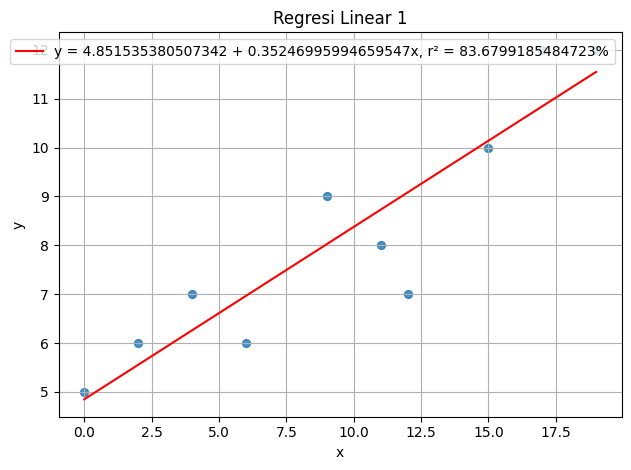

In [43]:
# @title Kemampuan model linear

from matplotlib import pyplot as plt
xs = np.linspace(0, np.max(RL1['x']), 1000)
RL1.plot(kind='scatter', x='x', y='y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(True)
plt.plot(xs, a+b*xs, color='red', label=f'y = {a} + {b}x, r² = {(r**2)*100}%')
plt.xlabel('x'); plt.ylabel('y')
plt.title('Regresi Linear 1')
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()

Menggunakan regresi model linear, diperoleh nilai **prosentase ketidakpastian** pada dataset yang cukup besar yaitu **$r^2 ≈ 83.68$%**. Hal ini mengimplikasikan model linear *kemungkinan* **bukanlah model optimal** untuk dataset ini.

# **Regresi Linear 2**

Lakukan regresi linear dan regresi polinomial (derajat dua atau lebih) untuk dataset berikut ini:

,x,y
0,1,1.0
1,2,1.5
2,3,2.0
3,4,3.0
4,5,4.0
5,6,5.0
6,7,8.0
7,8,10.0
8,9,13.0


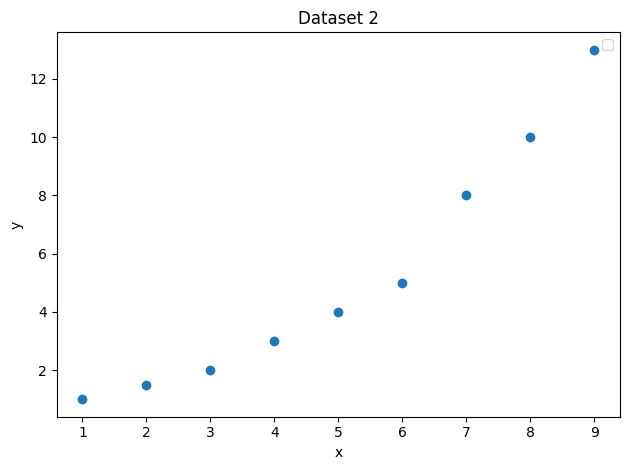

In [39]:
# @title Dataset 2

RL2 = pd.DataFrame({'x':[1,2,3,4,5,6,7,8,9],
                    'y':[1,1.5,2,3,4,5,8,10,13]})
display(RL2)

plt.scatter(RL2['x'], RL2['y'])
plt.xlabel('x'); plt.ylabel('y')
plt.title('Dataset 2')
plt.tight_layout()
plt.legend()
plt.show()

Mengingat jumlah titik data adalah 9, maka sekiranya diperlukan regresi polinom, maka derajat tertinggi untuk polinom tersebut adalah sebesar $9-1=8$.

*Lakukan regresi linear, kuadratik, dan seterusnya untuk memperoleh nilai-nilai $r^2$ dari setiap pendekatan regresi tersebut. (Plot tidak diminta untuk soal ini).*

In [40]:
# @title Regresi Polinom

import numpy as np
from sklearn.metrics import r2_score

x = RL2['x']; y = RL2['y']

print('Regresi Polinom derajat 1–8 dengan koefisien determinasi')

for n in range(1,len(RL2)):
  coeffs = np.polyfit(x, y, n)
  p = np.poly1d(coeffs)
  y_pred = p(x)
  r2 = r2_score(y, y_pred)
  print(p, '\n'
        f'r² = {r2}', '\n')

Regresi Polinom derajat 1–8 dengan koefisien determinasi
 
1.458 x - 2.014 
r² = 0.9143610668789809 

       2
0.191 x - 0.4518 x + 1.488 
r² = 0.9948894656299115 

         3           2
0.01052 x + 0.03319 x + 0.2131 x + 0.7937 
r² = 0.9960204007775664 

           4           3          2
-0.003351 x + 0.07754 x - 0.4144 x + 1.338 x - 0.02778 
r² = 0.9964937530622244 

           5           4          3         2
-0.001122 x + 0.02469 x - 0.1799 x + 0.642 x - 0.5274 x + 1.042 
r² = 0.9966813143067124 

          6           5          4         3         2
0.000787 x - 0.02473 x + 0.3009 x - 1.768 x + 5.285 x - 6.887 x + 4.111 
r² = 0.9969427865128501 

          7           6          5         4        3         2
0.001687 x - 0.05824 x + 0.8153 x - 5.942 x + 24.1 x - 53.59 x + 59.89 x - 24.22 
r² = 0.9993563761079692 

           8           7          6         5         4         3
0.0008433 x - 0.03204 x + 0.5076 x - 4.356 x + 22.01 x - 66.59 x
        2
 + 117 x - 107.5 x + 